In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("../data/df_agrupado.csv")
df.info()

C:\Users\pacof\AppData\Local\Temp\ipykernel_17304\779716044.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/df_agrupado.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135208 entries, 0 to 135207
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Numero_expedient                    135208 non-null  object 
 1   Codi_districte                      135208 non-null  float64
 2   Nom_districte                       135208 non-null  object 
 3   Codi_barri                          135208 non-null  object 
 4   Nom_barri                           135208 non-null  object 
 5   Codi_carrer                         135208 non-null  float64
 6   Nom_carrer                          135206 non-null  object 
 7   Descripcio_dia_setmana              135208 non-null  object 
 8   Mes_any                             135208 non-null  float64
 9   Nom_mes                             135208 non-null  object 
 10  Dia_mes                             135208 non-null  float64
 11  Hora_dia                  

In [21]:
X = df.select_dtypes("number")

In [22]:
X.drop(columns=["Numero_morts","Numero_lesionats_lleus","Numero_lesionats_greus"],inplace=True)

In [23]:
X.drop(columns=["Codi_districte","Codi_carrer","Mes_any","Dia_mes","Coordenada_UTM_Y","Coordenada_UTM_X", "Latitud","Longitud","Any"],inplace=True)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135208 entries, 0 to 135207
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Hora_dia                            135208 non-null  float64
 1   Numero_victimes                     135208 non-null  float64
 2   Numero_vehicles_implicats           135208 non-null  float64
 3   Altres                              135208 non-null  int64  
 4   Creuar per fora pas de vianants     135208 non-null  int64  
 5   Desconegut                          135208 non-null  int64  
 6   Desobeir altres senyals             135208 non-null  int64  
 7   Desobeir el senyal del semàfor      135208 non-null  int64  
 8   No és causa del vianant             135208 non-null  int64  
 9   Transitar a peu per la calçada      135208 non-null  int64  
 10  Abast                               135208 non-null  int64  
 11  Abast multiple            

In [26]:
y = df["Numero_morts"]

In [27]:
y.value_counts()

Numero_morts
0.0    134844
1.0       358
2.0         4
3.0         2
Name: count, dtype: int64

In [28]:
df["Numero_lesionats_greus"].value_counts()

Numero_lesionats_greus
0.0    132009
1.0      3018
2.0       157
3.0        21
4.0         2
6.0         1
Name: count, dtype: int64

In [29]:
df["Numero_lesionats_lleus"].value_counts()

Numero_lesionats_lleus
1.0     95333
2.0     20268
0.0     13937
3.0      3575
4.0      1202
5.0       467
6.0       225
7.0        95
8.0        47
9.0        22
10.0       12
12.0        8
11.0        7
13.0        3
14.0        3
25.0        2
15.0        1
21.0        1
Name: count, dtype: int64

In [31]:
df[df["Numero_lesionats_lleus"] > 9]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
3798,2024S004227,4.0,Les Corts,20,la Maternitat i Sant Ramon,343903.0,Corts,Diumenge,7.0,Juliol,...,0,0,1,0,0,0,0,0,1,0
7042,2023S000326,9.0,Sant Andreu,61,la Sagrera,140407.0,Garcilaso / Sant Antoni Maria Claret ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
10225,2023S003564,2.0,Eixample,6,la Sagrada Família,350308.0,València ...,Dijous,6.0,Juny,...,0,1,0,1,0,0,0,0,0,0
12208,2023S005573,10.0,Sant Martí,65,el Clot,209900.0,Meridiana / València ...,Dijous,9.0,Setembre,...,0,1,0,1,0,0,0,0,0,0
14764,2022S002794,3.0,Sants-Montjuïc,11,el Poble-sec,198804.0,Paral·lel / Entença ...,Dimarts,5.0,Maig,...,0,1,0,0,0,1,0,0,0,0
16018,2022S006464,5.0,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,701268.0,Isaac Newton / Tibidabo ...,Dimecres,10.0,Octubre,...,1,1,0,0,0,0,1,0,0,0
24146,2021S002991,8.0,Nou Barris,44,Vilapicina i la Torre Llobeta,119003.0,Fabra i Puig,Dissabte,6.0,Juny,...,0,0,1,0,0,0,0,1,0,0
24399,2021S003925,2.0,Eixample,8,l'Antiga Esquerra de l'Eixample,32700.0,Balmes,Dimecres,7.0,Juliol,...,0,1,0,0,0,0,1,0,0,0
33735,2020S003876,10.0,Sant Martí,104-10-69,Diagonal Mar i el Front Marítim del Poblenou,701266.0,Litoral (Llobregat),Diumenge,8.0,Agost,...,0,0,1,0,0,0,0,0,1,0
37209,2019S001085,2.0,Eixample,8,l'Antiga Esquerra de l'Eixample,144601.0,Diagonal / Balmes ...,Dilluns,2.0,Febrer,...,0,1,0,0,1,0,0,0,0,0


In [34]:
df[(df["Numero_lesionats_lleus"] == 3) & (df["Numero_victimes"] == 3)]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
4,2024S000005,4.0,Les Corts,19,les Corts,231502.0,Numància,Dilluns,1.0,Gener,...,0,0,1,0,1,0,0,0,0,0
5,2024S000006,8.0,Nou Barris,50,les Roquetes,700652.0,Torre Baró,Dilluns,1.0,Gener,...,0,0,1,0,1,0,0,0,0,0
86,2024S000095,8.0,Nou Barris,53,la Trinitat Nova,209900.0,Meridiana,Diumenge,1.0,Gener,...,0,0,1,0,0,0,0,0,1,0
211,2024S000232,2.0,Eixample,7,la Dreta de l'Eixample,305100.0,Sant Joan,Dissabte,1.0,Gener,...,0,0,1,0,0,0,0,1,0,0
262,2024S000286,8.0,Nou Barris,50,les Roquetes,701501.0,B-20 (Llobregat),Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135028,2010S008815,5.0,Sarrià-Sant Gervasi,23,Sarrià,701267.0,Dalt (Besòs),Dimarts,12.0,Desembre,...,1,1,0,0,0,1,0,0,0,0
135030,2010S006800,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Dimecres,10.0,Octubre,...,1,1,0,0,0,0,1,0,0,0
135174,2010S006640,8.0,Nou Barris,46,el Turó de la Peira,103003.0,Doctor Pi i Molist,Dijous,9.0,Setembre,...,0,1,0,1,0,0,0,0,0,0
135178,2010S004144,9.0,Sant Andreu,62,el Congrés i els Indians,121402.0,Felip II,Dilluns,6.0,Juny,...,0,1,0,0,1,0,0,0,0,0


In [38]:
df[(df["Numero_lesionats_lleus"] == 0) & (df["Numero_lesionats_greus"] == 0) & (df["Numero_morts"] == 0)]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
6719,2023S000002,7.0,Horta-Guinardó,33,el Baix Guinardó,109203.0,Encarnació ...,Diumenge,1.0,Gener,...,0,0,1,0,0,0,0,0,1,0
6748,2023S000032,4.0,Les Corts,21,Pedralbes,333400.0,González Tablas / Cavallers ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
6753,2023S000037,6.0,Gràcia,31,la Vila de Gràcia,344101.0,Gràcia ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
6768,2023S000052,10.0,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,30409.0,Bac de Roda / Diagonal ...,Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
6779,2023S000063,10.0,Sant Martí,66,el Parc i la Llacuna del Poblenou,169409.0,Corts Catalanes / Ciutat de Granada ...,Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135172,2010S008174,8.0,Nou Barris,44,Vilapicina i la Torre Llobeta,194406.0,Maragall,Diumenge,11.0,Novembre,...,0,0,1,0,0,0,0,0,1,0
135175,2010S008401,8.0,Nou Barris,45,Porta,356905.0,Verdum,Dilluns,12.0,Desembre,...,0,0,1,0,1,0,0,0,0,0
135180,2010S002760,9.0,Sant Andreu,61,la Sagrera,39709.0,Berenguer de Palou,Divendres,4.0,Abril,...,0,1,0,0,0,0,0,0,0,1
135182,2010S008859,9.0,Sant Andreu,62,el Congrés i els Indians,121402.0,Felip II,Dimecres,12.0,Desembre,...,0,1,0,0,0,0,1,0,0,0


In [39]:
df[df["Numero_morts"] == 3]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
83817,2015S007037,4.0,Les Corts,21.0,Pedralbes,115400.0,Esplugues,Dissabte,9.0,Setembre,...,0,0,1,0,0,0,0,1,0,0
122138,2011S000773,5.0,Sarrià-Sant Gervasi,23,Sarrià,278007.0,Reina Elisenda de Montcada,Dissabte,2.0,Febrer,...,1,0,1,0,0,0,0,1,0,0


In [66]:
met = np.log(10*df["Numero_morts"] + 2*df["Numero_lesionats_greus"] + 0.5*df["Numero_lesionats_lleus"] + 0.5*df["Numero_vehicles_implicats"] + 1)

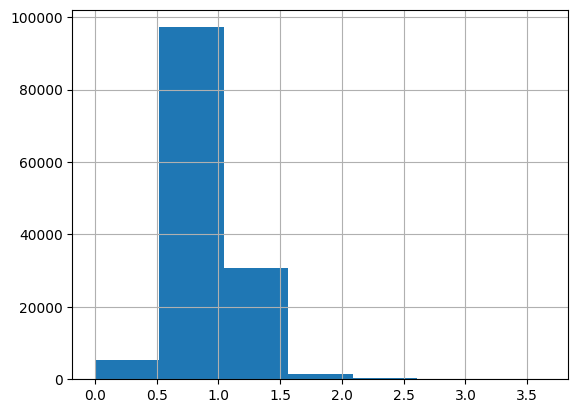

In [70]:
met.hist(bins = 7);

In [69]:
def classifica(val):
    if val < 0.5:
        return 0
    elif val < 1:
        return 1
    elif val < 1.5:
        return 2
    elif val < 2:
        return 3
    elif val < 2.5:
        return 4
    elif val < 3:
        return 5
    else:
        return 6

In [61]:
mapa = []
for i in met:
    mapa.append(classifica(i))

#mapa

In [62]:
df["Grau_emergencia"] = mapa

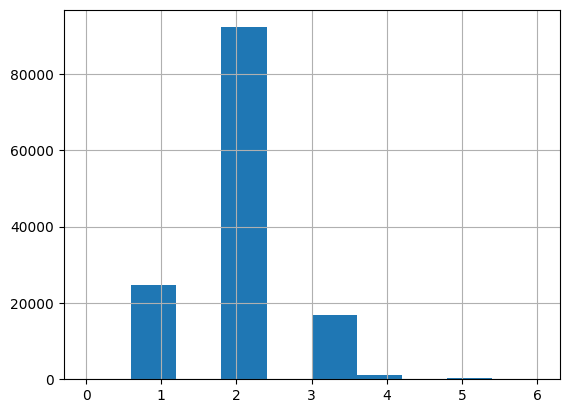